## Acknowldedgements

The code below is based on a Jupyter notebook found [here](http://nbviewer.jupyter.org/gist/damontallen/5721739). Thanks!

---

arduino code:

// analog-plot
// 
// Read analog values from A0 and A1 and print them to serial port.
//
// electronut.in

#include "Arduino.h"

void setup()
{
  // initialize serial comms
  Serial.begin(9600); 
}

void loop()
{
  // read A0
  int val1 = analogRead(0);
  // read A1
  int val2 = analogRead(1);
  // print to serial
  Serial.print(val1);
  Serial.print(" ");
  Serial.print(val2);
  Serial.print("\n");
  // wait 
  delay(50);
}

# Plotting Arduino Data in Jupyter

In Ubuntu, made this work by running:

> pip install pyserial

In [1]:
%matplotlib qt

import sys, serial
import numpy as np
from time import sleep
from collections import deque
from matplotlib import pyplot as plt

In [2]:
# class that holds analog data for N samples
class AnalogData:
  # constr
  def __init__(self, maxLen):
    self.ax = deque([0.0]*maxLen)
    self.ay = deque([0.0]*maxLen)
    self.maxLen = maxLen

  # ring buffer
  def addToBuf(self, buf, val):
    if len(buf) < self.maxLen:
      buf.append(val)
    else:
      buf.pop()
      buf.appendleft(val)

  # add data
  def add(self, data):
    assert(len(data) == 2)
    self.addToBuf(self.ax, data[0])
    self.addToBuf(self.ay, data[1])

In [3]:
# plot class
class AnalogPlot:
  # constr
  def __init__(self, analogData):
    # set plot to animated
    self.fig, axplt = plt.subplots() #plt.ion() 
    self.axline, = axplt.plot(analogData.ax, markersize=1.)
    self.ayline, = axplt.plot(analogData.ay, markersize=1.)
    plt.ylim([0, 1023]) 
    #plt.ylim([0, 300]) 
    
  # update plot
  def update(self, analogData):
    self.axline.set_ydata(analogData.ax)
    self.ayline.set_ydata(analogData.ay)
    self.fig.canvas.draw()
    self.fig.canvas.flush_events()
    #plt.draw()


In [4]:
# main() function
def main(dev):

    strPort = dev

    # plot parameters
    analogData = AnalogData(100)
    analogPlot = AnalogPlot(analogData)
    print('plotting data...')

    # open serial port
    ser = serial.Serial(strPort, 9600)

    while True:
        try:
            #.strip(b'\x00').decode('ascii') added for IPython3
            line = ser.readline().strip(b'\x00').decode('ascii')
            data = [float(val) for val in line.split()]
            if(len(data) == 2):
                analogData.add(data)
                #analogData.add(data/1024.*5.)
                analogPlot.update(analogData)
        except: #Interrupt the kernal to exit
            print('Exiting')
            break
    
    # close serial
    ser.flush()
    ser.close()


In [5]:
#Execute prior to plugging in the arduino
pre_list = !ls /dev/tty*

In [6]:
#Execute after plugging in the arduino
post_list = !ls /dev/tty*
for tty_dev in post_list:
    if tty_dev not in pre_list:
        print("Your device id is {}".format(tty_dev))
        dev = tty_dev

Your device id is /dev/ttyUSB0


In [7]:
main(dev) #it will take a moment for the plot to be generated ... 

plotting data...
Exiting


error: (5, 'Input/output error')

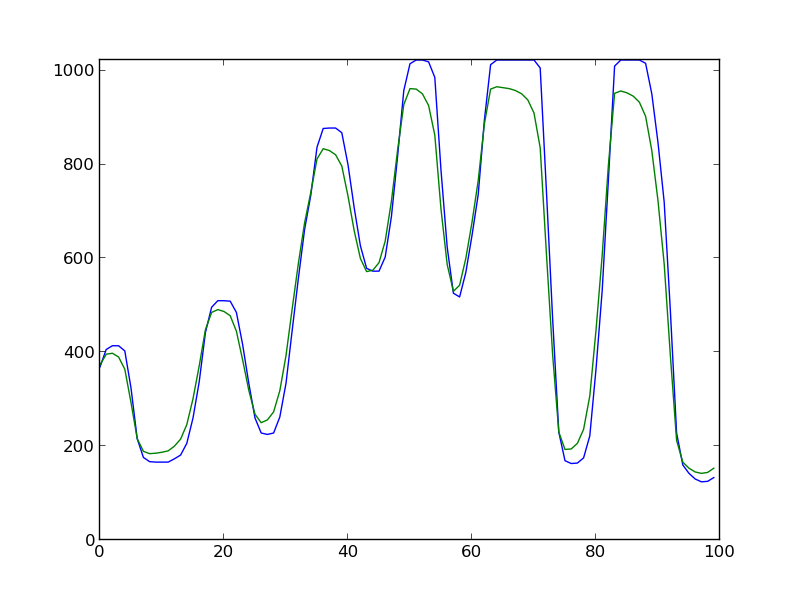

In [8]:
from IPython.display import Image
PWD = !pwd
Image(filename=PWD[0]+'/figure_2.png')
#Image of plot output with 1 variable resister connected and the other line floating

## Changes made due to the differences between IPython3 and IPython

###The serial data collection was modified to run in IPython3 with the addition of

    #.strip(b'\x00').decode('ascii') added to...
    line = ser.readline().strip(b'\x00').decode('ascii')
    #in main()

###to deal with the differences between python3-serial and python-serial

## Arduino Code

This code was copied from [Plotting real-time data from Arduino using Python](http://electronut.in/plotting-real-time-data-from-arduino-using-python/)

    // analog-plot
    // 
    // Read analog values from A0 and A1 and print them to serial port.
    //
    // electronut.in

    #include "Arduino.h"

    void setup()
    {
      // initialize serial comms
      Serial.begin(9600); 
    }

    void loop()
    {
      // read A0
      int val1 = analogRead(0);
      // read A1
      int val2 = analogRead(1);
      // print to serial
      Serial.print(val1);
      Serial.print(" ");
      Serial.print(val2);
      Serial.print("\n");
      // wait 
      delay(50);
    }

##Hookup


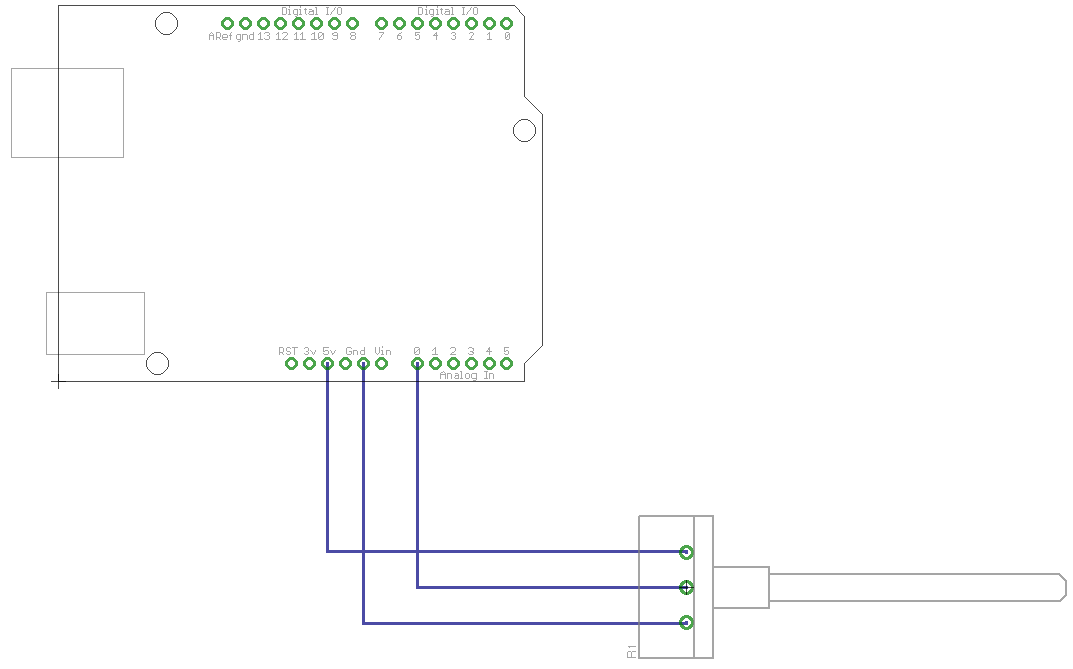

In [11]:
Image(filename=PWD[0]+'/Arduino_image.png')